In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend

In [72]:
dataframe = pd.read_excel('D:\dekstop\Flask_app\KOE_database.xlsx')

In [73]:
# fix random seed for reproducibility
np.random.seed(7)

In [74]:
dataframe.drop('time', inplace=True, axis=1)

In [75]:
dataset = dataframe.values

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [77]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train_x = dataset[0:train_size, 0:-1]
train_y = dataset[0:train_size, -1]
test_x = dataset[0:test_size, 0:-1]
test_y = dataset[0:test_size, -1]

In [78]:
from sklearn import preprocessing as pp

# Prepocess data - Scaling X data (Min-Max)
min_max_scaler = pp.MinMaxScaler()
train_x_scale = min_max_scaler.fit_transform(train_x)
test_x_scale = min_max_scaler.transform(test_x)

# Preprocess data - Scaling Y data (Normalize)
train_y_norm = train_y / max(train_y)
test_y_norm = test_y / max(train_y)

In [79]:

# Create Neural Network Model
model = Sequential()                       # Initialization of model
model.add(Input(shape=(4,)))               # Input layer
model.add(Dense(2,activation='relu'))   # 1st Hidden Layer with 15 nodes and Activation Function = Sigmoid
model.add(Dense(1))                        # Output layer with 1 node and Activation Function = Linear [y = x]

model.compile(optimizer='adam',
              loss='mse')

# Train Neural Network Model
history = model.fit(train_x_scale, train_y_norm,
          batch_size=32, epochs=200, validation_data=(test_x, test_y))

oss: 0.2611
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2152 - val_loss: 0.2325
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1941 - val_loss: 0.2045
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1720 - val_loss: 0.1766
Epoch 10/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1496 - val_loss: 0.1490
Epoch 11/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1277 - val_loss: 0.1234
Epoch 12/200
8/8 [==============================] - 0s 9ms/step - loss: 0.1073 - val_loss: 0.1011
Epoch 13/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0902 - val_loss: 0.0819
Epoch 14/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0740 - val_loss: 0.0667
Epoch 15/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0614 - val_loss: 0.0548
Epoch 16/200
8/8 [==============================] - 0s 17ms/step - loss: 0.0512 - val_loss: 0.0455
Epoch 17

In [80]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


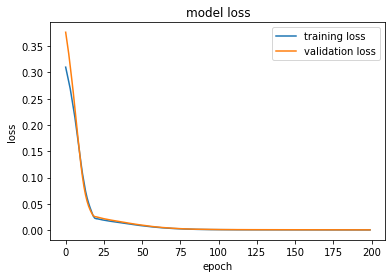

In [81]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

In [82]:
# make predictions
trainPredict = model.predict(train_x_scale)
testPredict = model.predict(test_x_scale)

In [83]:
#testPredict

In [84]:
from sklearn.metrics import r2_score

# Evaluate the model
loss = model.evaluate(test_x_scale, test_y_norm)
print("loss (MSE):",loss)

# R2 coefficient
r2 = r2_score(test_y_norm, testPredict)
print("R2:",r2)

4/4 [==============================] - 0s 1ms/step - loss: 3.0747e-04
loss (MSE): 0.0003074736741837114
R2: 0.9945799542789735


In [85]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train_y_norm, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore*100))
testScore = math.sqrt(mean_squared_error(test_y_norm, testPredict))
print('Test Score: %.2f RMSE' % (testScore*100))

Train Score: 1.37 RMSE
Test Score: 1.75 RMSE


In [86]:
#calculate mean absolute percent error
trainMAPE = mean_absolute_error(train_y, trainPredict)
print('train MAPE: %.2f MAPE' % (trainMAPE*100))
testMAPE = mean_absolute_error(test_y, testPredict)
print('test MAPE: %.2f MAPE' % (testMAPE*100))

train MAPE: 0.81 MAPE
test MAPE: 0.85 MAPE


In [18]:

# Get something which has as many features as dataset
testPredict_extended = np.zeros((len(testPredict),5))
# Put the predictions there
testPredict_extended[:,4] = testPredict[:,0]
# Inverse transform it and select the 5rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,4]
print('testPredict',testPredict)

testPredict [ 7593.27211665 10411.55630942 10816.61480303  7808.48572007
  6494.12401591 10496.97392693 11200.76171139 11106.9235155
 11290.97142104 10626.14470484  6944.03263374  6557.20864262
 10579.92315663 11212.34603514 11701.49631948 11222.30464272
 10920.47298737  7823.46440588  7745.82900571 10948.97124805
 11083.2883734  10918.74029312  9573.42947787  8280.90270261
  5162.16967779   132.98450284  1896.515843    8900.01820869
  9300.71602998  9731.22829315  9153.45981741  6484.75466467
  6754.40783781  9788.40808025 10177.23747205  9916.46786442
 10339.19001843 10609.79810252  7105.54148413  7237.02456706
 11102.57599623 12213.13480055 12417.09992125 11412.84401361
 10198.17010217  7228.76094834  7007.14532027 10505.5532187
 10891.28112288 10683.56300045 10134.73911199  9727.34639162
  7107.88272585  7385.94507806 11903.85764577 12129.8295618
 12089.52951373 12376.59556257 11654.42596154  7996.49356854
 12258.20414215  7518.61544238 11951.46815536 13383.48997072
 13220.41327756

In [83]:
#convert your array into a dataframe
#dfTest = pd.DataFrame (testPredict)    
#dfTest.to_excel("Output.xlsx", sheet_name='Sheet 1')

In [84]:
model.save("prediction.h5")